In [16]:
import pandas as pd
import sqlite3


## make a connection to the database

In [17]:
base = sqlite3.connect("../data/checking-logs.sqlite.sqlite_copy")

## run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [18]:
pd.io.sql.read_sql('''PRAGMA table_info(pageviews)''', base)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


In [19]:
table = pd.io.sql.read_sql('''SELECT uid, datetime FROM pageviews WHERE uid LIKE "user_%"''', base, parse_dates=['datetime'])
table

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144
...,...,...
982,user_28,2020-05-21 18:45:20.441142
983,user_19,2020-05-21 23:03:06.457819
984,user_25,2020-05-21 23:23:49.995349
985,user_5,2020-05-22 11:30:18.368990


## using Pandas, create a new dataframe where the visits are counted and grouped by date

In [30]:
t = table.groupby(table['datetime'].dt.date).agg({"uid":['count']}).reset_index()
t.columns = ['date', 'view']
t.set_index('date', inplace=True)
t

,view
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


<AxesSubplot: title={'center': 'Views per day'}, xlabel='date'>

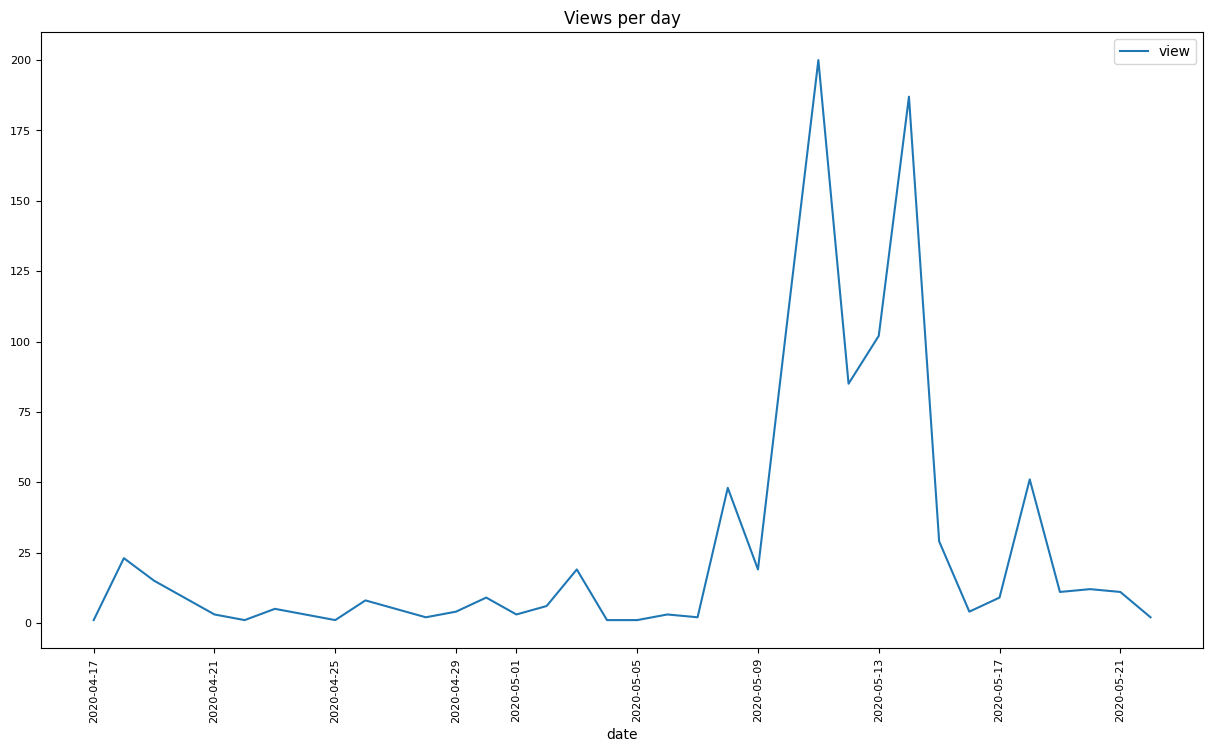

In [21]:
t.plot(fontsize=8, figsize=(15, 8), title='Views per day', rot=90)

## close the connection to the database

In [22]:
base.close()